Directory, libraries

In [ ]:
%cd /content/drive/MyDrive/Business Analyst course/Predictive Analytics/Prophet

/content/drive/MyDrive/Business Analyst course/Predictive Analytics/Prophet


In [ ]:
#import libraies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [ ]:
#data
df = pd.read_csv('Udemy_wikipedia_visits.csv')
df.head()

,Date,Udemy,Easter,Christmas,Black Friday
0,1/1/2016,311,0,0,0
1,1/2/2016,564,0,0,0
2,1/3/2016,517,0,0,0
3,1/4/2016,652,0,0,0
4,1/5/2016,756,0,0,0


In [ ]:
#Looking the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          1827 non-null   object
 1   Udemy         1827 non-null   int64 
 2   Easter        1827 non-null   int64 
 3   Christmas     1827 non-null   int64 
 4   Black Friday  1827 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 71.5+ KB


In [ ]:
#summary statistics

df.describe()

,Udemy,Easter,Christmas,Black Friday
count,1827.000000,1827.000000,1827.000000,1827.000000
mean,943.068418,0.002737,0.002737,0.002737
std,531.341700,0.052256,0.052256,0.052256
min,209.000000,0.000000,0.000000,0.000000
25%,542.500000,0.000000,0.000000,0.000000
50%,832.000000,0.000000,0.000000,0.000000
75%,1175.000000,0.000000,0.000000,0.000000
max,2847.000000,1.000000,1.000000,1.000000


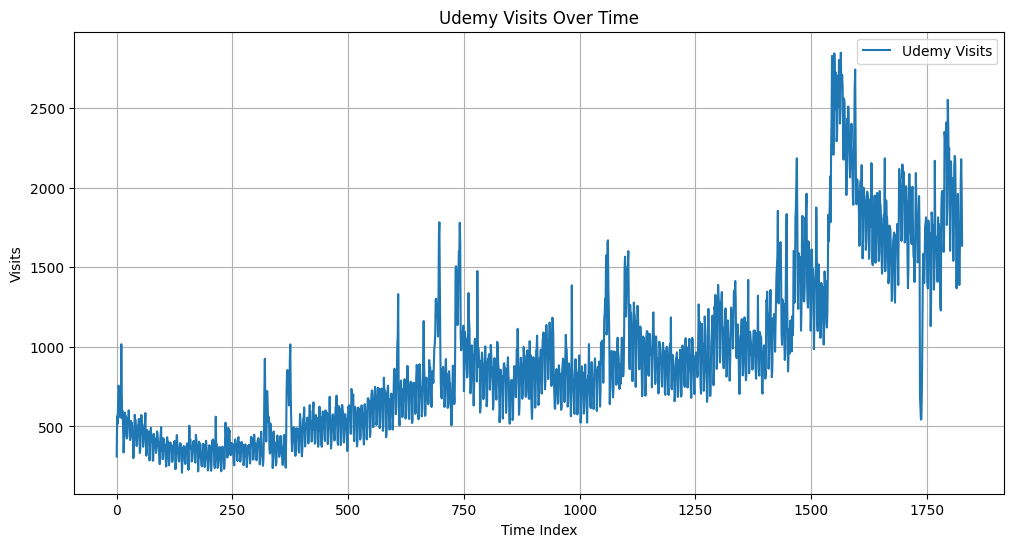

In [ ]:
#plotting
# Plotting the 'Udemy' column
plt.figure(figsize=(12, 6))
plt.plot(df['Udemy'], label='Udemy Visits')
plt.title('Udemy Visits Over Time')
plt.xlabel('Time Index')
plt.ylabel('Visits')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Data preparation
df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')

# Display the DataFrame to verify the change
df.head()

,Date,Udemy,Easter,Christmas,Black Friday
0,2016-01-01,311,0,0,0
1,2016-01-02,564,0,0,0
2,2016-01-03,517,0,0,0
3,2016-01-04,652,0,0,0
4,2016-01-05,756,0,0,0


In [ ]:
#change variable name date --> ds and Udemy --> y

In [ ]:
#Change variable: Date -> ds, time-series (Udemy) -> y
df = df.rename(columns = {'Date': 'ds',
                          'Udemy': 'y'})
df.head(1)


,ds,y,Easter,Christmas,Black Friday
0,2016-01-01,311,0,0,0


#Holiday

In [ ]:
#Easter
easter_dates = df[df.Easter == 1].ds
easter = pd.DataFrame({'holiday': 'easter', 'ds':easter_dates, 'lower_window': -5, 'upper_window': 2})

#Black Friday

In [ ]:
# Holiday: Black Friday
bf_dates = df[df['Black Friday'] == 1].ds  # Fix comparison
black_friday = pd.DataFrame({
    'holiday': 'black_friday',
    'ds': bf_dates,
    'lower_window': -7,  # No offset before Black Friday
    'upper_window': 5   # 1 day after Black Friday
})

In [ ]:
# Combine the holidays
holidays = pd.concat([easter, black_friday])
holidays

,holiday,ds,lower_window,upper_window
86,easter,2016-03-27,-5,2
471,easter,2017-04-16,-5,2
821,easter,2018-04-01,-5,2
1206,easter,2019-04-21,-5,2
1563,easter,2020-04-12,-5,2
329,black_friday,2016-11-25,-7,5
693,black_friday,2017-11-24,-7,5
1057,black_friday,2018-11-23,-7,5
1428,black_friday,2019-11-29,-7,5
1792,black_friday,2020-11-27,-7,5


In [ ]:
#Remove holidays for the main data frame

df = df.drop(columns=['Easter', 'Black Friday'])
df.head()


,ds,y,Christmas
0,2016-01-01,311,0
1,2016-01-02,564,0
2,2016-01-03,517,0
3,2016-01-04,652,0
4,2016-01-05,756,0


Prophet Model

In [ ]:
#training and test split
test_days = 31
training = df.iloc[:-test_days, :]
test = df.iloc[-test_days:, :]
print(test.head())
print(training.tail())

              ds     y  Christmas
1796  2020-12-01  2393          0
1797  2020-12-02  2185          0
1798  2020-12-03  2249          0
1799  2020-12-04  1964          0
1800  2020-12-05  1603          0
              ds     y  Christmas
1791  2020-11-26  2294          0
1792  2020-11-27  2409          0
1793  2020-11-28  1765          0
1794  2020-11-29  1883          0
1795  2020-11-30  2551          0


In [ ]:
#Prophet Model
m = Prophet(growth = 'linear',
            yearly_seasonality = True,
            weekly_seasonality = True,
            daily_seasonality = False,
            holidays = holidays,
            seasonality_mode = 'additive',
            seasonality_prior_scale = 10,
            holidays_prior_scale = 10,
            changepoint_prior_scale= 0.05)
m.add_regressor('Christmas', mode = 'multiplicative')
#m.add_regressor('XXXX')
m.fit(training)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfumqof62/w8qeznli.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfumqof62/i_i1e2ml.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61315', 'data', 'file=/tmp/tmpfumqof62/w8qeznli.json', 'init=/tmp/tmpfumqof62/i_i1e2ml.json', 'output', 'file=/tmp/tmpfumqof62/prophet_modelswhepjs3/prophet_model-20241115141107.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:11:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#Regressor coefficients
from prophet.utilities import regressor_coefficients
regressor_coefficients(m)

,regressor,regressor_mode,center,coef_lower,coef,coef_upper
0,Christmas,multiplicative,0.0,-0.327456,-0.327456,-0.327456


In [ ]:
#it measns that the visit to udemy in christmas drop in 32.74 %

#Forecasting

In [ ]:
#create future dataframe

future = m.make_future_dataframe(periods = test_days, freq = 'D')
future.head()

future = pd.concat([future, df.iloc[:, 2:]], #to this future i will add all the regresors
                   axis = 1)
future

,ds,Christmas
0,2016-01-01,0
1,2016-01-02,0
2,2016-01-03,0
3,2016-01-04,0
4,2016-01-05,0
...,...,...
1822,2020-12-27,0
1823,2020-12-28,0
1824,2020-12-29,0
1825,2020-12-30,0


In [ ]:
#forecasting
forecast = m.predict(future)
forecast.head()
print(forecast.columns)

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'Christmas', 'Christmas_lower', 'Christmas_upper', 'additive_terms',
       'additive_terms_lower', 'additive_terms_upper', 'black_friday',
       'black_friday_lower', 'black_friday_upper', 'easter', 'easter_lower',
       'easter_upper', 'extra_regressors_multiplicative',
       'extra_regressors_multiplicative_lower',
       'extra_regressors_multiplicative_upper', 'holidays', 'holidays_lower',
       'holidays_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'weekly', 'weekly_lower', 'weekly_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'yhat'],
      dtype='object')


In [ ]:
#Holiday assessment

holiday = 'easter'
forecast[(forecast[holiday].abs() > 0) & (forecast['ds'] > '2020-01-01')][
    ['ds', holiday]]

,ds,easter
1558,2020-04-07,-20.931457
1559,2020-04-08,-37.660970
1560,2020-04-09,3.459589
1561,2020-04-10,28.889363
1562,2020-04-11,76.345721
1563,2020-04-12,87.603613
1564,2020-04-13,85.205301
1565,2020-04-14,27.674121


In [ ]:
#Retrieve the predictions
predictions = forecast.yhat[-test_days:]

In [ ]:
#Accuracy assessment
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_absolute_error(test.y, predictions))
print(np.sqrt(mean_squared_error(test.y, predictions)))

187.3028102683454
238.79838072154143


##Visualization

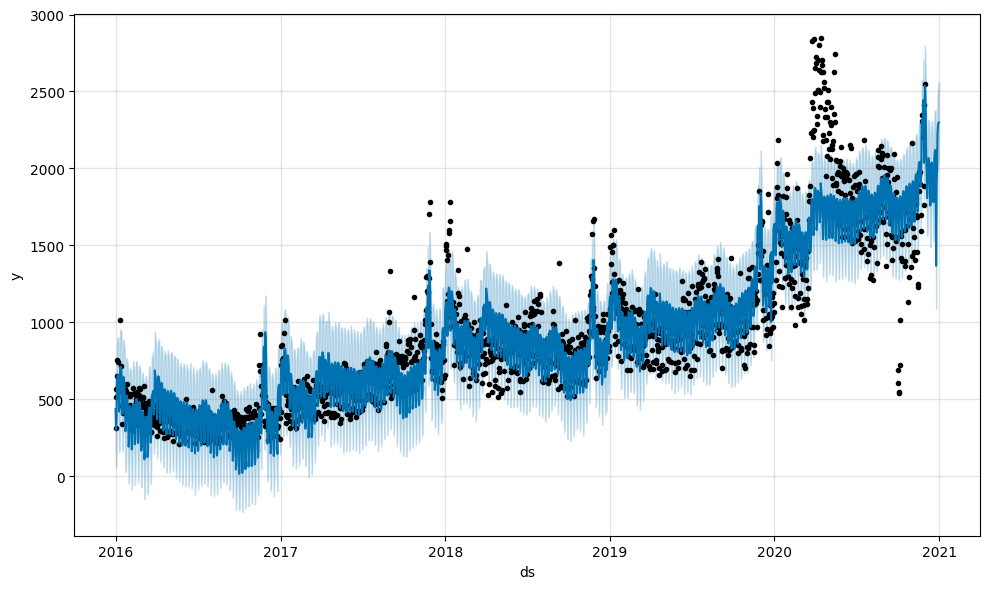

In [ ]:
m.plot(forecast);

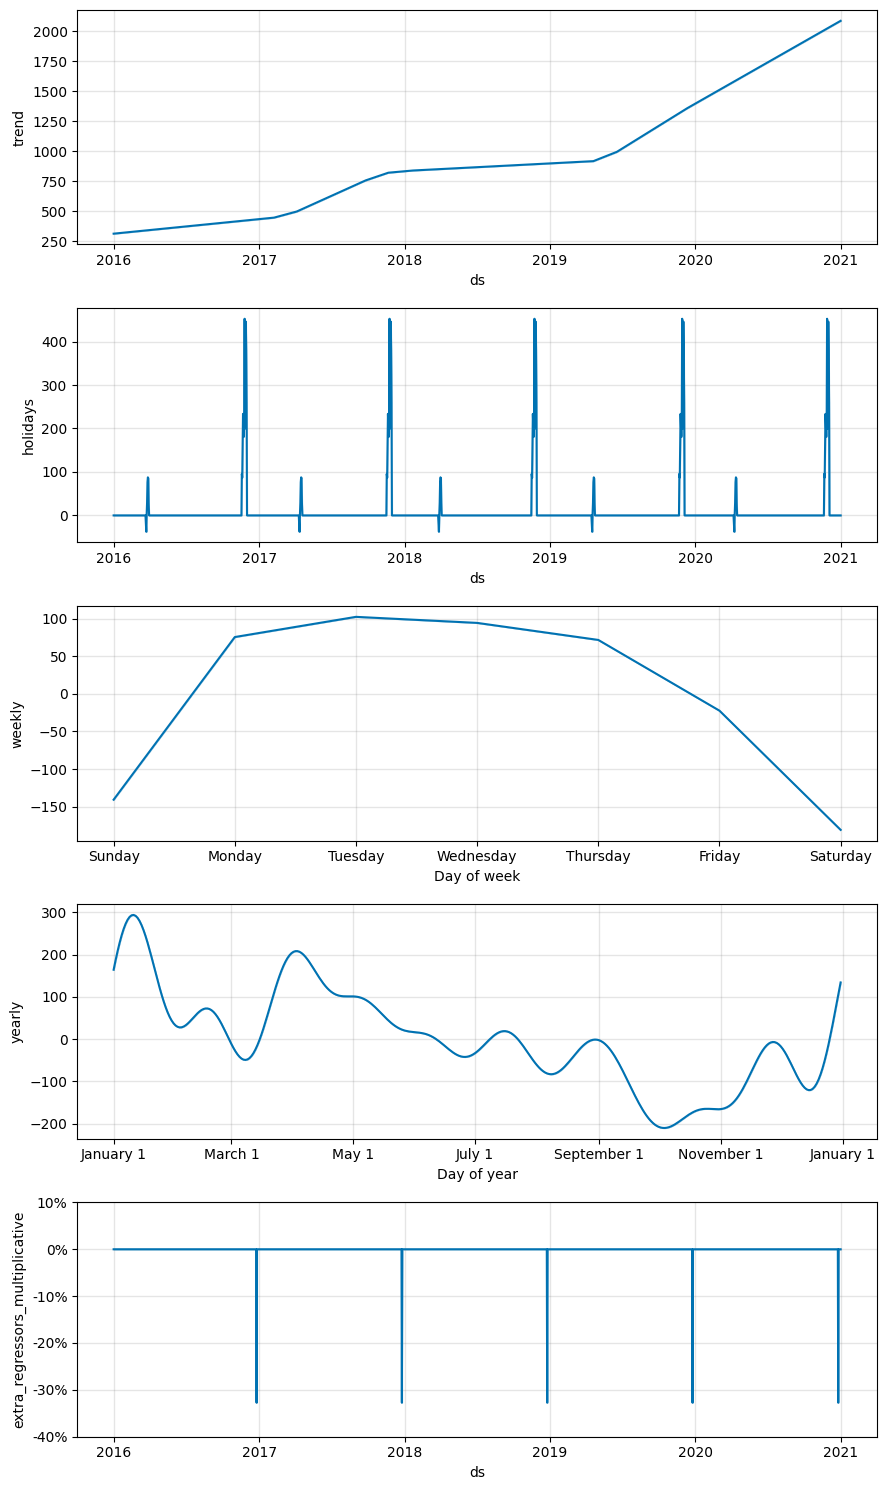

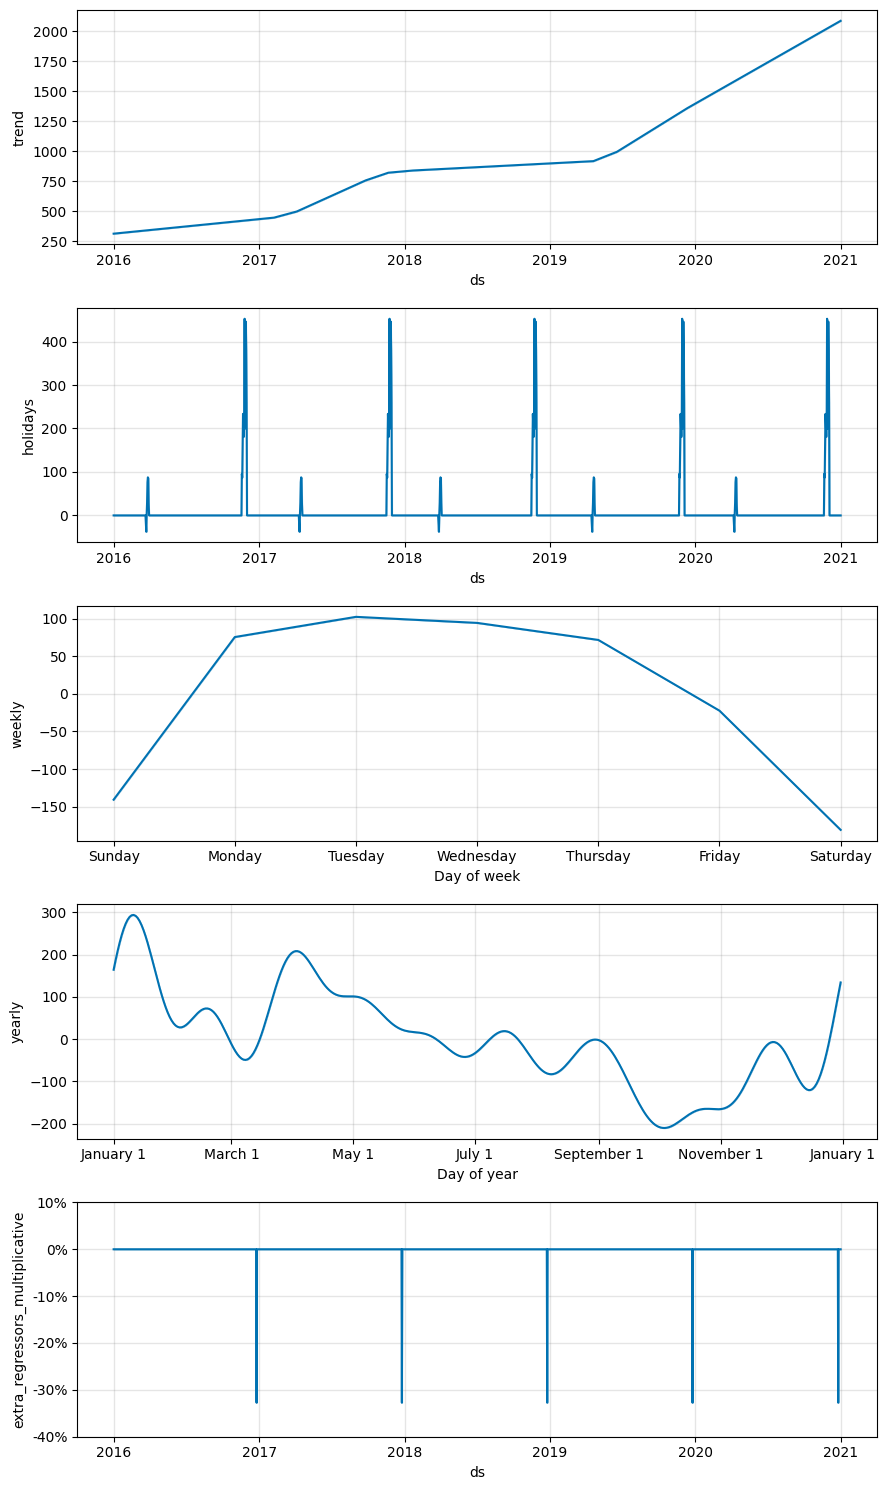

In [ ]:
#plot components --> structural time series decomposition
m.plot_components(forecast)

##Cross validation

In [ ]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m,
                         horizon = '31 days',
                         initial = '1450 days',
                         parallel = 'processes')

INFO:prophet:Making 21 forecasts with cutoffs between 2019-12-25 00:00:00 and 2020-10-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a61e624bca0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfumqof62/4j_2ry16.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfumqof62/hj9dizmf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfumqof62/paajcpom.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59221', 'data', 'file=/tmp/tmpfumqof62/4j_2ry16.json', 'init=/tmp/tmpfumqof62/paajcpom.json', 'output', 'file=/tmp/tmpfumqof62/prophet_model3fcdzuiu/prophet_model-20241115145508.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:55:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfumqof62/2gkljo5t.json
DE

In [ ]:
#output of the CV
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-12-26,1282.681827,1151.184402,1417.432413,1165,2019-12-25
1,2019-12-27,1224.100240,1082.480442,1352.940978,1111,2019-12-25
2,2019-12-28,1102.782630,974.807776,1238.193776,1038,2019-12-25
3,2019-12-29,1164.656977,1036.649292,1298.493099,971,2019-12-25
4,2019-12-30,1373.216749,1232.153790,1507.685456,1192,2019-12-25


In [ ]:
#Error assessment
print(mean_absolute_error(df_cv['y'], df_cv['yhat']))
print(np.sqrt(mean_squared_error(df_cv['y'], df_cv['yhat'])))

399.32610768953765
517.55770497542


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


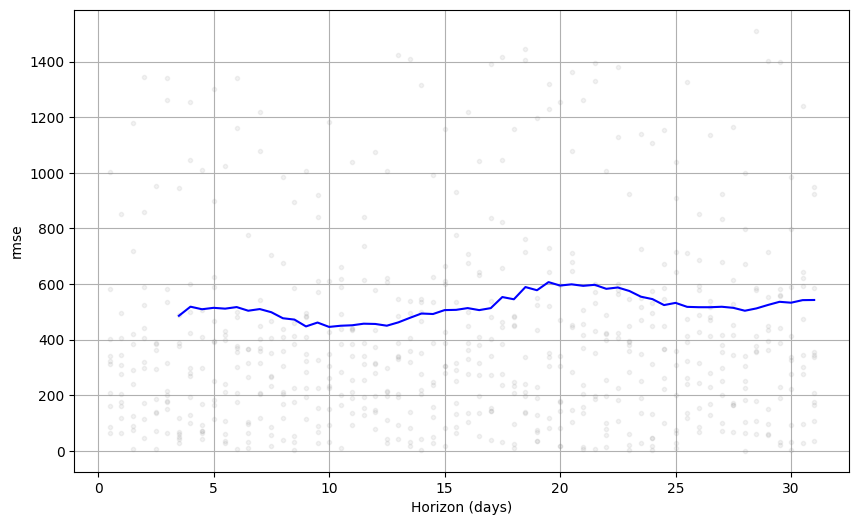

In [ ]:
#CV Visualization
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv,
                             metric = 'rmse');


#Parameter tuning

In [ ]:
#Parameter Grid
from sklearn.model_selection import ParameterGrid
param_grid = {'seasonality_mode': ['additive', 'multiplicative'],
              'seasonality_prior_scale': [5, 10, 20],
              'holidays_prior_scale': [5, 10, 20],
              'changepoint_prior_scale': [0.01, 0.05, 0.1]}
grid = ParameterGrid(param_grid)
len(list(grid))

54

In [ ]:
### the output of len(list(grid)) should be 54, indicating there are 54 unique combinations of parameters in the grid.

In [ ]:
#Empty list to store results
rmse = []
#start the loop
for params in grid:
  #build the model
  m = Prophet(growth = 'linear',
            yearly_seasonality = True,
            weekly_seasonality = True,
            daily_seasonality = False,
            holidays = holidays,
            seasonality_mode = params['seasonality_mode'],
            seasonality_prior_scale = params['seasonality_prior_scale'],
            holidays_prior_scale = params['holidays_prior_scale'],
            changepoint_prior_scale= params['changepoint_prior_scale'])
  m.add_regressor('Christmas', mode = 'multiplicative')
  m.fit(training)

  #Cross-Validation
  df_cv = cross_validation(m,
                           horizon = '31 days',
                           initial = '1450 days',
                           parallel = 'processes')

  #Measure and store results
  error = np.sqrt(mean_squared_error(df_cv['y'], df_cv['yhat']))
  rmse.append(error)

Streaming output truncated to the last 5000 lines.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfumqof62/zvjp2v82.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfumqof62/chds5j_q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87320', 'data', 'file=/tmp/tmpfumqof62/zvjp2v82.json', 'init=/tmp/tmpfumqof62/chds5j_q.json', 'output', 'file=/tmp/tmpfumqof62/prophet_modelttputzt4/prophet_model-20241115153259.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:32:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:33:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 21 forecasts with cutoffs between 2019-12-25 00:00:00 and 2020-10-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object

In [ ]:
#Get the best parameters
tuning_results = pd.DataFrame(grid)
tuning_results['rmse'] = rmse
tuning_results

,changepoint_prior_scale,holidays_prior_scale,seasonality_mode,seasonality_prior_scale,rmse
0,0.01,5,additive,5,512.109627
1,0.01,5,additive,10,513.047127
2,0.01,5,additive,20,511.581045
3,0.01,5,multiplicative,5,528.123101
4,0.01,5,multiplicative,10,533.398678
5,0.01,5,multiplicative,20,531.076191
6,0.01,10,additive,5,510.809080
7,0.01,10,additive,10,511.420321
8,0.01,10,additive,20,509.607141
9,0.01,10,multiplicative,5,529.235154
